In [1]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

import itertools as it
import time
import random

from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Theme

The theme of the project is simulating spread of information over online social networks.

# Aim

The main purpose of this project is to simulate a real work environment where your team has to collaborate on a common task. You will need

* to learn new material independently;
* to distribute the workload evenly between the team members;
* to work with real data sets.

# Objectives

In the end of the course project, students should be able to 

1. Load Facebook data from [Stanford Large Network Dataset Collection](http://snap.stanford.edu/data/ego-Facebook.html) into Python.

2. Summarize basic facts on existing random network models (Erdős–Rényi model, Watts-Strogatz model, Barabási–Albert model, Mediation-Driven Attachement model etc.)
3. Impement from scratch random network models that have not been implemented in the library `networkx`, such as the Mediation-Driven Attachment model.

4. Evaluate how closely random network models resemble Facebook.
5. Simulate spread of information over a network using SIR model and/or its modifications.

6. Fit parameters of spread of information into real data.
7. Communicate findings in a report and a presentation

# Tasks

Below is a list of specific tasks in the project. It is recommended that team members should discuss these tasks and that everyone should be familiar with main ideas in each task. However, each task should b assigned to one or two students who will complete it. Otherwise it is just too much work.

1. Orchestrating team work, i.e., being the team leader and telling everyone what to do.

2. Implementing the MDA model. This is a challenging task as the student who will do it is supposed to read about the model and figure out how to implement it in Python. 

3. Implementing one more model of the team's choice. It can be either something that students invent or something that they read about. The easiest thing to do is to use some existing model in `networkx`, such as geometric random graph. A slightly harder thing to do is to combine two models - say, construct a WS model with half the required edges and a BA model with half the required edges and combine them. More challenging ways to solve this task will require implementing yet another random network model from scratch.

4. Analysing properties of existing models: ER (covered in class), WS (covered in class), BA (self-study), MDA (task 2), something else (task 3) and evaluating which one resembles Facebook more closely than others. The person responsible for this task should load Facebook into Python and summarize all the knowledge on these networks in one table.

5. Implementing spread of information using the SIR model or its modification. This is a challenging task. 
6. Finding parameters $p$ and $q$ of the SIR model that fit the data. This is the easiest task since it only requires writing down the right objective function (which can be found in last year's reports) and feeding it to particle swarm optimization.

7. Making slides for the presentation.
8. Putting together the final report.

# Resources

Resources for the project (available on NTULearn) include

1. Newman's paper "The structure and function of complex networks" - good for almost all the tasks (random network models, spread of information)
2. Hassan et al "Degree Distribution, Rank-size Distribution, and Leadership Persistence in Mediation-Driven Attachment Networks" - the MDA model
3. Poli et al "Particle swarm optimization" - for those of you who are interesed how PSO works
4. Selected last year reports of your seniors. Note that you can use these reports as a source of inspitation, but you should be aware that last year project rubrics were different and that the language was MATLAB. 

# Random networks

In class we have covered two random network models - Erdős–Rényi model and Watts-Strogatz model. You will independently learn at least three more - Barabási–Albert model, Mediation Driven Attachment Model, and a model of your choice. 

## Barabási–Albert model

This is one more simple model similar to Erdős–Rényi and Watts-Strogatz models that we learned in class. It has two parameters, $n$ and $k$. Here, $n$ is the number of vertices, and $2k$ is close to the average degree of a vertex.

In [2]:
def nice_plot_network(G):
    v_degrees = np.array(list(dict(nx.degree(G)).values()))
    nx.draw(G, node_size = 2.5 * v_degrees, node_color = 'blue', alpha = 0.2, edge_color = 'green')
    return None

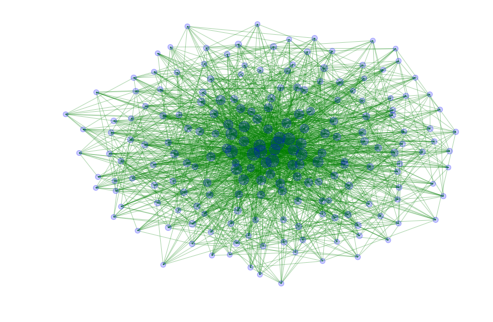

In [3]:
B = nx.barabasi_albert_graph(200, 10)
nice_plot_network(B)
plt.show()

In [4]:
def print_network_chars(G):
    vertex_degrees = list(dict(nx.degree(G)).values())
    plt.hist(vertex_degrees, 
         bins = np.linspace(np.min(vertex_degrees),
                          1 + np.max(vertex_degrees), 20),
         facecolor='blue', alpha=0.75, rwidth = 0.9) 
    plt.title("Vertex degree distribution")
    plt.grid(True)
    plt.show()
    n = nx.number_of_nodes(G)
    m = nx.number_of_edges(G)
    CC = nx.average_clustering(G)
    print("|V| =", n)
    print("|E| =", m)
    print("Average degree is", 2 * m / n)
    print("CC =", CC)
    return None

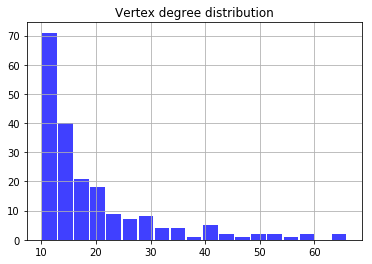

|V| = 200
|E| = 1900
Average degree is 19.0
CC = 0.17823833237650316


In [5]:
print_network_chars(B)

In [21]:
seed_size = 20
n = 200
m = 5

G = nx.erdos_renyi_graph(seed_size, 0.5)

list_of_graphs = [nx.Graph.copy(G)]
v_degrees = np.array(list(dict(nx.degree(G)).values()))
list_of_degrees = [v_degrees.copy()]

for v in np.arange(seed_size, n):
    v_exist = G.nodes()
    v_degrees = np.array(list(dict(nx.degree(G)).values()))
    v_to_connect = np.random.choice(v_exist, size = m, 
                                    p = v_degrees / np.sum(v_degrees),
                                    replace = False).reshape(m, 1)
    new_edges = np.concatenate((v * np.ones((m, 1)), v_to_connect), axis = 1)
    G.add_edges_from(new_edges)
    v_degrees = np.array(list(dict(nx.degree(G)).values()))
    list_of_graphs.append(nx.Graph.copy(G))
    list_of_degrees.append(v_degrees.copy())

positions = nx.spring_layout(G)
    
def plot_func(frame):
    nx.draw(list_of_graphs[int(frame)], 
            node_size = list_of_degrees[frame] * 5, 
            pos = positions,
            node_color = 'blue', 
            alpha = 0.2, 
            edge_color = 'green')
    plt.show()
 

In [22]:
interact( plot_func, 
    frame = widgets.Play( value = 0, min = 0, max = n - seed_size, step = 1, description = "Press play", disabled = False))

interactive(children=(Play(value=0, description='Press play', max=180), Output()), _dom_classes=('widget-inter…

<function __main__.plot_func(frame)>

# Facebook

Below we load the data from the file

In [8]:
E = np.loadtxt("facebook_combined.txt")
E = E.astype(int)
E.shape

(88234, 2)

Now we plot the graph.

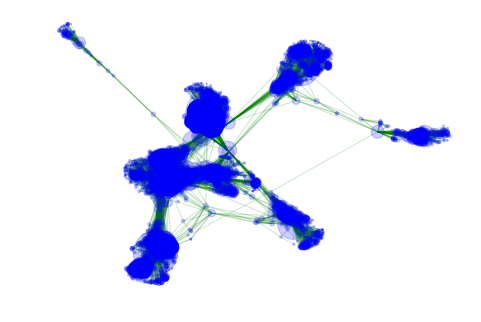

In [9]:
G = nx.Graph()
G.add_edges_from(E)
nice_plot_network(G)

Here are some stats

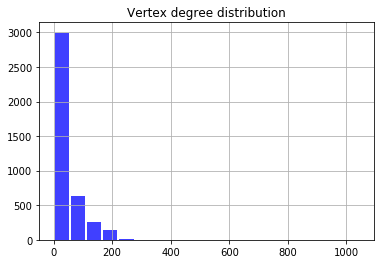

|V| = 4039
|E| = 88234
Average degree is 43.69101262688784
CC = 0.6055467186200876


In [10]:
print_network_chars(G)

## Approximate Facebook

For each random network model that you know, you need to evaluate how well it approximates Facebook. You will create a random network with characteristics as close to Facebook as possible and argue with of them is the best model for Facebook. Note that there is no right or wrong answer - the goal here is to summarize your knowledge of random networks.

# Spread of information over a network

Spread of information over Facebook goes as follows: initially, some people know about a certain event (e.g, "Lee family saga"), their friends learn this information from them, then friends of their friends learn this information etc. An external observer does not have access to the social structure of Facebook or to private information Facebook users share, but can access the history of google searches on a particular topic.

History of Google searches "Lee family" in June 2017, from Google Trends:

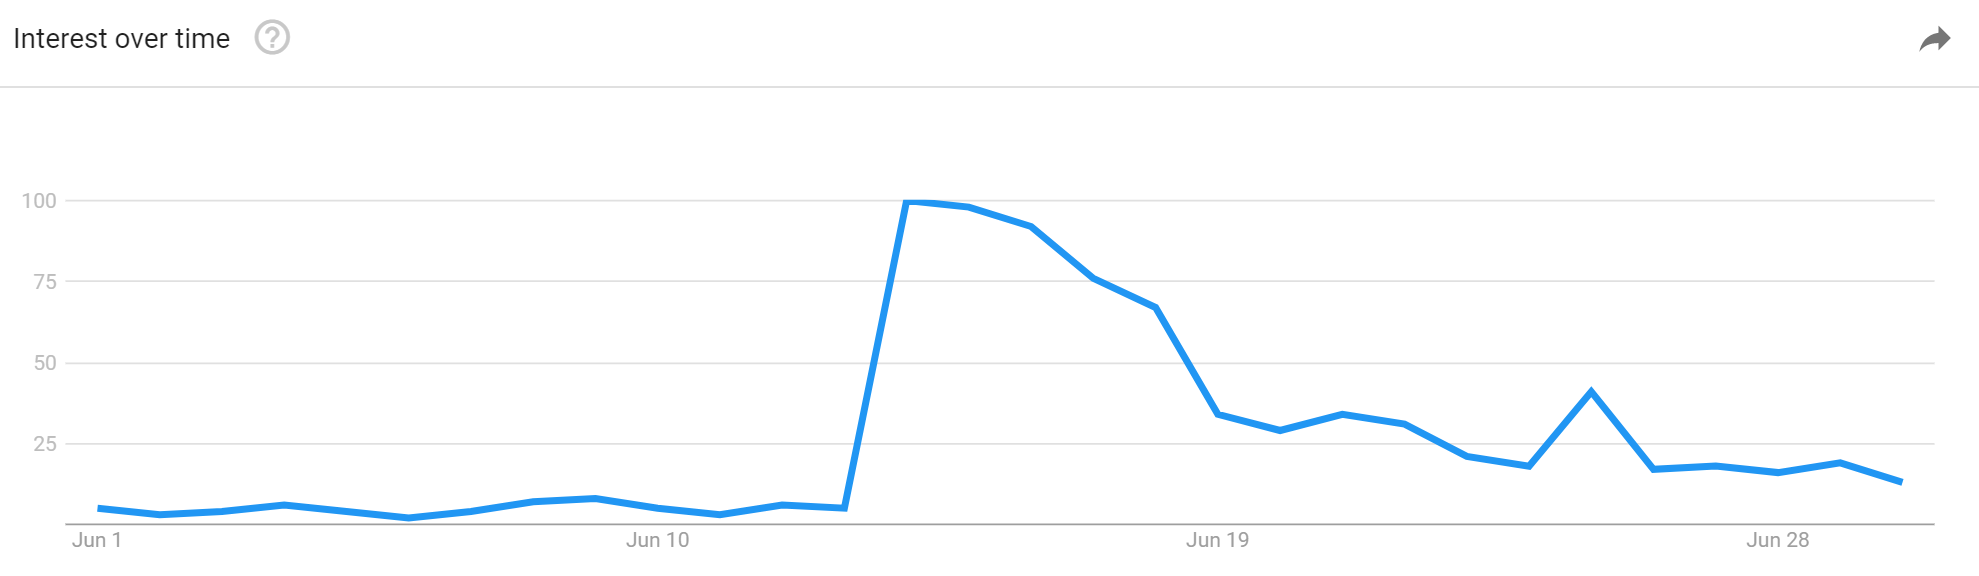

### Overview of SIR model

Let $G$ be a network whose nodes represent people who can be in one of the three states:

* Succeptible - does not know about the event
* Infected - knows about the event and manifests her interest by doing Google search
* Recovered - knows about the event but does not care any more

The time is discrete and initially some nodes are infected and the rest are susceptible. At each moment, susceptible nodes may get infected from their neighbours with probability $p$ and infected nodes may recover and become immune with probability $q$.

In [11]:
def plot_SIR(G, positions, node_colors):
    nx.draw(G, 
            node_size = 50, 
            pos = positions,
            node_color = node_colors, 
            #alpha = 0.2, 
            edge_color = 'green')

p = 0.3
q = 0.2


color_table = np.repeat(['yellow', 'blue', 'green'], 1)
node_colors = color_table[ 1 * (np.random.rand(50) < 0.1)]
W = nx.watts_strogatz_graph(50, 6, 0.2)

positions = nx.spring_layout(W)

Infected nodes are shown with blue, not infected with yellow:

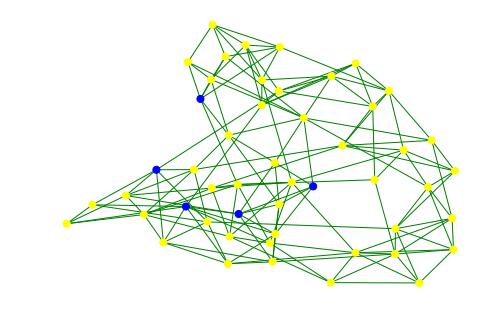

In [12]:
plot_SIR(W, positions, node_colors)
plt.show()

Note that the code below is meant to explain the concept rather than find infected nodes in an optimal manner. Students are not supposed to re-use it in their reports.

In [13]:
def one_step_SIR(G, node_colors, p, q):
    node_next_colors = np.copy(node_colors)
    for v in np.arange(nx.number_of_nodes(G)):
        if node_colors[v] == 'blue':
            node_neighbors = np.array(list(G.neighbors(v)))
            ind_infected = np.random.rand(len(node_neighbors)) < p
            node_next_colors[node_neighbors[ind_infected]] = 'blue'
            if np.random.rand(1) < q:
                node_next_colors[v] = 'green'
    
    node_next_colors[np.where(node_colors == 'green')] = 'green'            
    return node_next_colors

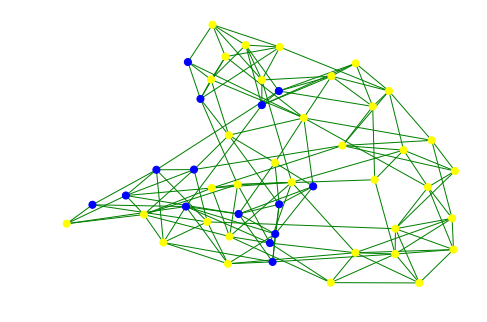

In [14]:
node_colors = one_step_SIR(W, node_colors, p, q)       
plot_SIR(W, positions, node_colors)
plt.show()

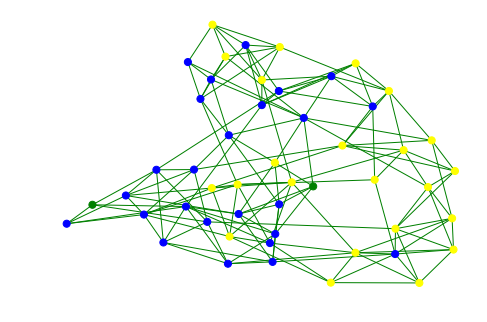

In [15]:
node_colors = one_step_SIR(W, node_colors, p, q)       
plot_SIR(W, positions, node_colors)
plt.show()

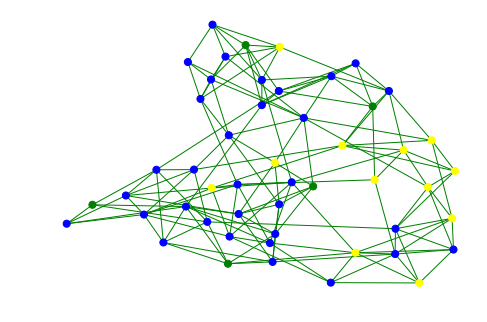

In [16]:
node_colors = one_step_SIR(W, node_colors, p, q)       
plot_SIR(W, positions, node_colors)
plt.show()

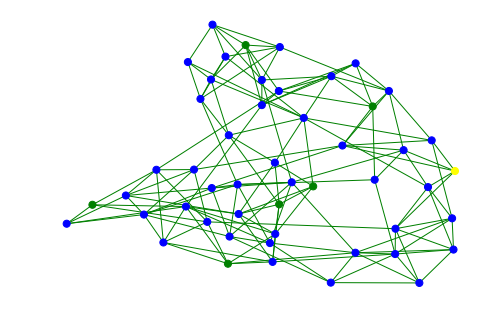

In [17]:
node_colors = one_step_SIR(W, node_colors, p, q)       
plot_SIR(W, positions, node_colors)
plt.show()

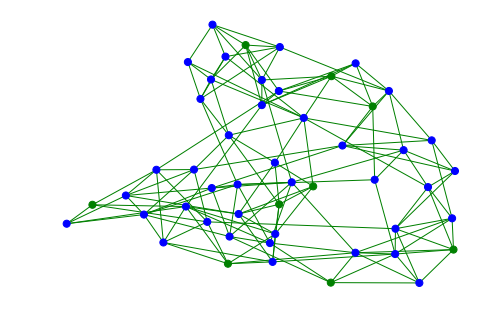

In [18]:
node_colors = one_step_SIR(W, node_colors, p, q)       
plot_SIR(W, positions, node_colors)
plt.show()

### The number of infected nodes 

For each iteration of the SIR process, we can find the number of infected nodes and plot the number of infected nodes as a function of the number of iterations

In [19]:
y = np.zeros(30)
x = np.arange(30)
node_colors = color_table[ 1 * (np.random.rand(50) < 0.1)]

for day in x:
    y[day] = np.sum(node_colors == 'blue')
    node_colors = one_step_SIR(W, node_colors, p, q)
    

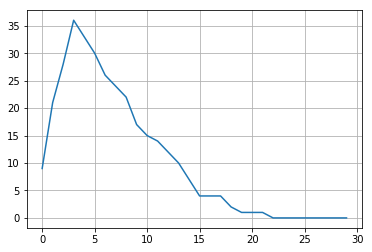

In [20]:
plt.plot(x, y)
plt.grid(True)
plt.show()

Depending on the values of $p$ and $q$, this plot may be a good or a bad approximation for the real data downloaded from Google Trends.

# Summary of the project

You need to review random network models, including those taught in class and those not taught in class, and decide which of them is the best approximation for Facebook. A piece of actual Facebook can be downloaded in [Stanford Large Network Dataset Collection](http://snap.stanford.edu/data/ego-Facebook.html). You need to figure out how to load it into Python.

Then you need to think of an event in the past that people usually get to know about from Facebook and download the history of Google Searches about the event in [Google Trends](https://trends.google.com/trends/) and load this data into Python.

The real piece of Facebook may be too large for simulating spread of information for it. You need to create a small random network that resembles Facebook and simulate spread of information over that small model of Facebook.

Finally, you find values of your model's parameters (for the pure SIR model, the parameters are $p$ and $q$, but you are encouraged to explore modifications and other models) that fit the real data using Particle Swarm Optimization.

# Milestones

**Weeks 9-10** will be devoted on learning the basics. By the end of Week 10, the team should have Python routines for generating random networks and for modelling spread of information over a network. There must be at least one person who learned  LaTeX. On week 10 there will be a meeting with the course instructor to discuss distribution of tasks within the team.

**Week 11** will be devoted to group discussions. You will need to discuss which random network model is best suitable to model Facebook, which event you want to research, load Google trends data into Python, and fit parameters of the model into data.

**Week 12** will be devoted to putting everything together. You will prepare the presentation and the final report. You are encouraged to come to class to get feedback from the instructor.

**Week 13** will be devoted to actual presentations. Each presentation will take 10 minutes during the lab according to a schedule given to you in advance by the course instructor. You are encouraged but don't have to attend other teams'  resentations. The course instructor will grade your presentation and will give you formative feedback on the rest of your project according to the official rubrics. You are encourageed to submit a draft of your report to the instructor on week 13 to get more comprehensive feedback.

**Study week** will be devoted to updating the final report based on the instructor's feedback. There will be peer evaluation of
teammates' work too.

# Report

The deadline for submission is 1 week after the week 13 lab session. The report must be contain at most 6000 words, including Python codes and references, prepared in Jupyter Notebook and then published into a PDF. It must be written in good English. All the logic of your report must be clear from the text, i.e., the grader does not have to read the Python code to understand the report.

The report must contain the following parts (you can choose other titles but the order should be the same for convenience of the grader):

### Abstract 

At most 200 words where you describe the scope of the project
and present the main ndings.

### Overview of random networks 

Here, you present a few random network models and explore their properties.

### Modelling Facebook 

Here you load Facebook data from Stanford Large Network Dataset Collection into Python, explore the network properties,
and explain which random network is most suitable to model Facebook.

### Spread of information over a network 

Here you outline the model of information spread over a network.

### Research of the event 

Here you download data on some Google search from Google trends, load them into Python, and fit parameters of your
model into real data.

### Extras 

This is an optional section. It is up to you what to write there.

### References 

This is the list of sources that you used, including research and expository papers, data sources, your seniors' reports, and links to Python codes developed by other people that you found online. Everything that you borrowed from other people should be explicitly cited.

# Fair grading

To ensure that individual contribution to the team's work is graded fairly, the following rules will be implemented:

### Peer evaluation

Each student will grade relative contributions of all the team members (i.e., it is not possible to give someone 10 out of 10 or 1 out 10, but it is possible to report that student A's contributed 10 times more than student B) and write short reviews justifying the grades. The content of each review is: contribution of the team member who is being evaluated, strength, and suggestions for improvement. 

These reviews will be carefully read by the instructor and 10% of the total project score will be given for writing comprehensive and fair reviews and for consistency of numeric scores that one reports with the team's opinion (this is to discourage unfairly high mutual scores that friends may want to give to each other).

The output of peer evaluation is your estimated contribution measured as percentage of the average contribution. For instance, "0.83" means that, according to your teammates, your contribtion is 83% of the average workload in the team.

### Research log

Each team is supposed to either communicate via WhatsApp chat to organize their work or to keep a research log in a shared online document. In the former case, the course instructor should be included to the WhatsApp chat and in the latter case the online document should be shared with the instructor.

### Appeal

If you're not happy with your project score, i.e., if you think that your true workload is unfairly estimated by your teammates, you can appeal to the course instructor. He will then investigate your case by re-examining all numeric and textual peer reviews in your team and by reading your team's log. Then the course instructor will overwrite scores produced by peer evaluation with his hown scores.

Hoever, if your team hasn't shared the log with the instructor, chances are that your score will not change.

### Rubrics

The instructor will grade your project according to the [rubrics](https://docs.google.com/spreadsheets/d/1oQSOYjeeEcY2PEEojjTHsfNkp9tv3bRy7BuMf85NGF0/edit?usp=sharing), giving your team a score $T$ out of 100. Suppose that your contribution according to peer evaluation is $P$ (a number close to 1). Your final individual score is then
$$
\delta_{0, P}\cdot\min(100, 0.5T +0.5TP),
$$
i.e., 50% of the score comes from your team, and 50% is your contribution to the team. Further, you can't exceed 100. If your contribution is 0, then your project score is annulled and you automatically fail the course. However, if it is close to 0 but positive, your individual project score will be close to half of the team score.

This number is 50% of the entire course mark, with 10% coming from the quiz and 40% from the midterm test.